### Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression
import seaborn as sns

### Descarga el conjunto de datos

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

### Carga del conjunto de datos

In [ ]:
df = pd.read_csv(url, sep=';')

### Visualización

In [ ]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Asignación de variables dependiente e independientes

In [ ]:
X = df.drop(columns=['quality'])
y = df['quality']

### Conversión a clasificación binaria

In [ ]:
y = (y >= 6).astype(int)

### Conjunto de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

### Normalización de los datos

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Clase para la red neuronal de funci´pon de base radial con distancia euclidiana

In [ ]:
class Red_Neuronal_Radial:
  def __init__(self, num_centers = 10, sigma = 1.0):
    self.num_centers = num_centers
    self.sigma = sigma
    self.centers = None
    self.model = LogisticRegression()

  def _rbf_kernel(self, X, centers):
    return np.exp(-cdist(X, centers, 'sqeuclidean') / (2 * self.sigma**2))

  def fit(self, X, y):
    indices = np.random.choice(len(X), self.num_centers, replace=False)
    self.centers = X[indices]
    X_rbf = self._rbf_kernel(X, self.centers)
    self.model.fit(X_rbf, y)

  def predict(self, X):
    X_rbf = self._rbf_kernel(X, self.centers)
    return self.model.predict(X_rbf)

  def decision_function(self, X):
    X_rbf = self._rbf_kernel(X, self.centers)
    return self.model.decision_function(X_rbf)

### Modelo

In [ ]:
rbf = Red_Neuronal_Radial(num_centers=10, sigma=1.0)

### Entrenamiento de la red

In [ ]:
rbf.fit(X_train, y_train)

### Predicciones

In [ ]:
y_pred = rbf.predict(X_test)
print(y_pred)

[1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1]


### Evaluación del modelo

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")


Precisión del modelo: 0.5583


Matriz de confusión:
[[ 40 172]
 [ 40 228]]


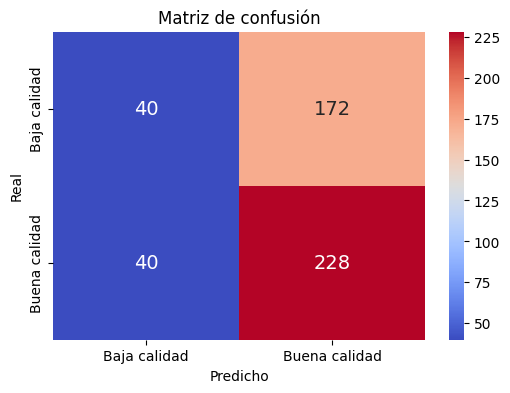

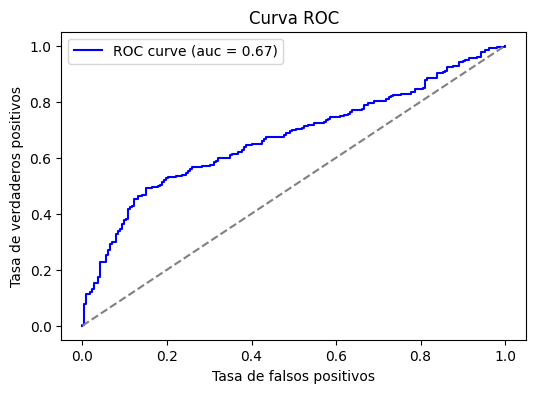

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', annot_kws={'size': 14}, xticklabels=['Baja calidad', 'Buena calidad'], yticklabels = ['Baja calidad', 'Buena calidad'])

plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

y_scores = rbf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label= f'ROC curve (auc = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()